# Ablation Study 2.5: Mask Level Analysis

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

sns.set_theme(style="whitegrid")

fig_dir = Path('figures')
fig_dir.mkdir(exist_ok=True)


plt.rcParams.update({
    "font.size": 27,
    "axes.titlesize": 27,
    "axes.labelsize": 27,
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "legend.fontsize": 22,
    "figure.titlesize": 27
})

plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'


## Load and Process Results

In [2]:
results_dir = Path('./results')
all_data = []
legend_names = {
    'ffhq': 'FFHQ',
    'adience': 'Adience',
    'animals': 'Animals'
}

for result_file in results_dir.glob('*.json'):
    with open(result_file, 'r') as f:
        try:
            data = json.load(f)
            benchmark_name = legend_names.get(data['benchmark_name'], data['benchmark_name'])
            for level, metrics in data['mask_levels'].items():
                all_data.append({
                    'benchmark': benchmark_name,
                    'run': data['run'],
                    'mask_level': level,
                    'worst_group_accuracy': metrics['worst_group_accuracy'],
                    'rejection_rate': metrics['rejection_rate']
                })
        except json.JSONDecodeError:
            print(f'Warning: Could not decode JSON from {result_file}')

df = pd.DataFrame(all_data)

## Performance Comparison

/tmp/ipykernel_2959081/969408420.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Tight', 'Medium', 'Loose'])


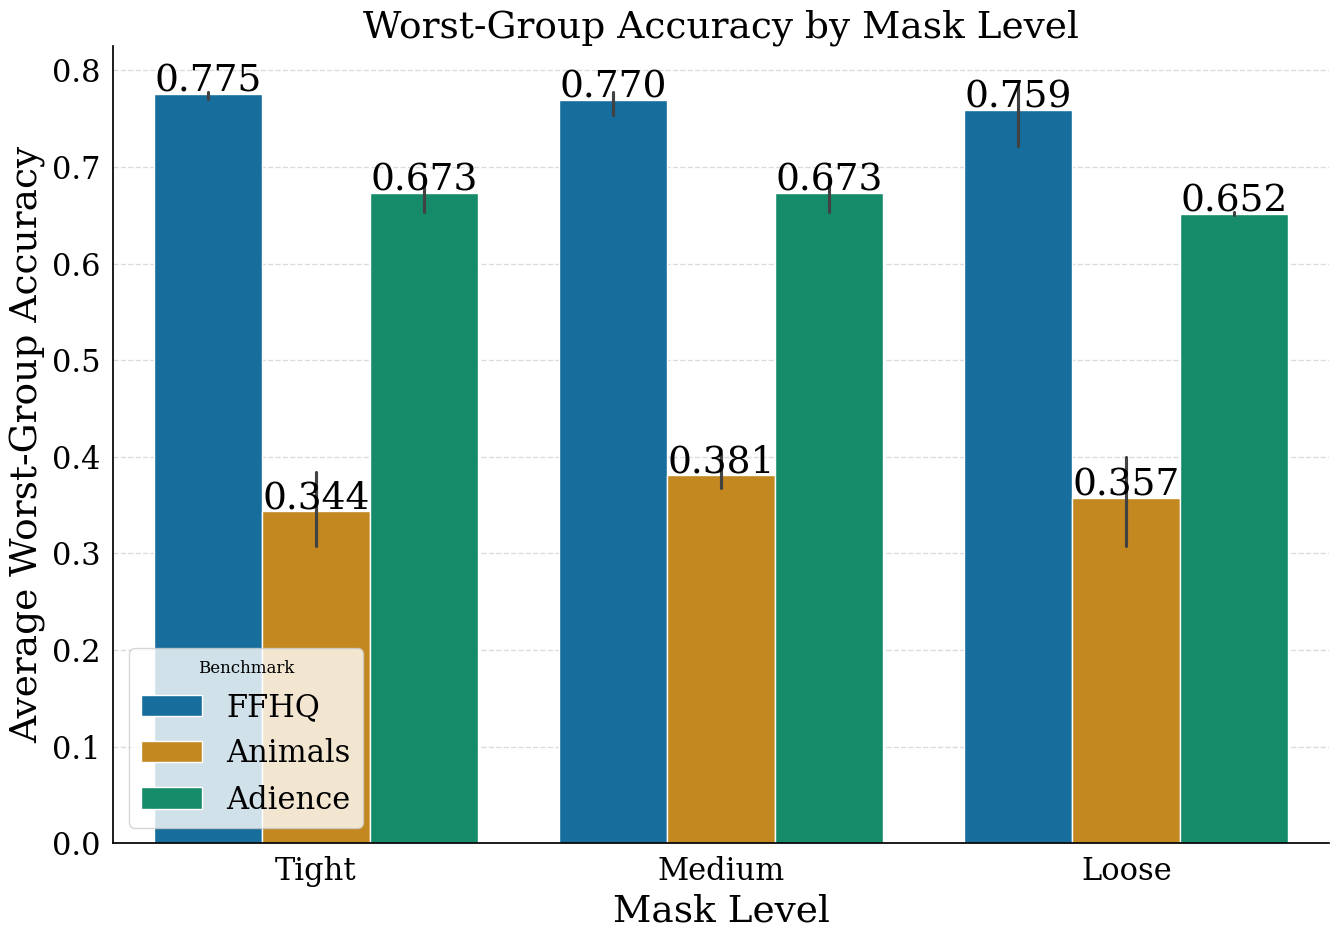

/tmp/ipykernel_2959081/969408420.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Tight', 'Medium', 'Loose'])


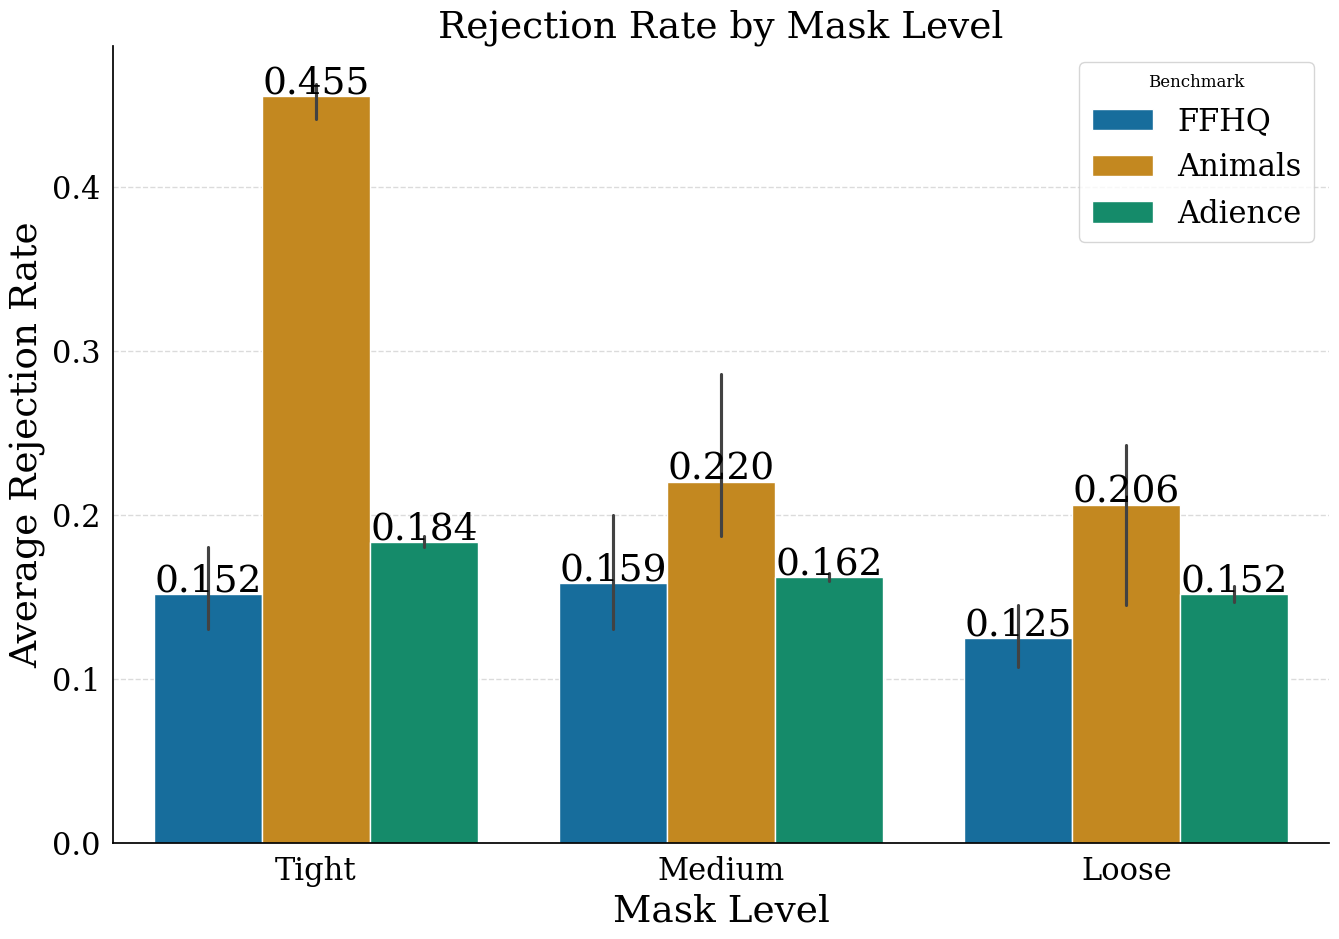

In [6]:
# Plot 1: Worst-Group Accuracy
plt.figure(figsize=(14, 10))
ax1 = sns.barplot(
    x='mask_level',
    y='worst_group_accuracy',
    hue='benchmark',
    data=df,
    palette='colorblind',
    order=['accurate', 'moderate', 'imprecise']
)

ax1.set_title('Worst-Group Accuracy by Mask Level')
ax1.set_xlabel('Mask Level')
ax1.set_ylabel('Average Worst-Group Accuracy')
ax1.set_xticklabels(['Tight', 'Medium', 'Loose'])

sns.despine()
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_axisbelow(True)
ax1.legend(title='Benchmark')

for p in ax1.patches:
    if abs(p.get_height()) > 1e-8:  # Don't annotate very small/zero bars
        ax1.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

plt.tight_layout()
plt.savefig(fig_dir / 'worst_group_accuracy_by_mask_level.png', bbox_inches='tight')
plt.show()

# Plot 2: Rejection Rate
plt.figure(figsize=(14, 10))
ax2 = sns.barplot(
    x='mask_level',
    y='rejection_rate',
    hue='benchmark',
    data=df,
    palette='colorblind',
    order=['accurate', 'moderate', 'imprecise']
)

ax2.set_title('Rejection Rate by Mask Level')
ax2.set_xlabel('Mask Level')
ax2.set_ylabel('Average Rejection Rate')
ax2.set_xticklabels(['Tight', 'Medium', 'Loose'])

sns.despine()
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_axisbelow(True)
ax2.legend(title='Benchmark')

for p in ax2.patches:
    if abs(p.get_height()) > 1e-8:  # Don't annotate very small/zero bars
        ax2.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

plt.tight_layout()
plt.savefig(fig_dir / 'rejection_rate_by_mask_level.png', bbox_inches='tight')
plt.show()